In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
#loading the dataset
dataset = pd.read_csv('/content/Project 1 - Weather Dataset.csv')

In [ ]:
# Map weather into 5 categories
def map_weather(cond):
    cond = cond.lower()
    if "clear" in cond: return "Clear"
    if "cloud" in cond or "overcast" in cond: return "Cloudy"
    if any(x in cond for x in ["rain","drizzle","shower","thunderstorm"]): return "Rain"
    if "snow" in cond: return "Snow"
    return "Fog/Haze"
df = dataset.copy()

df["Weather_Category"] = df["Weather"].apply(map_weather)

In [ ]:
#assigning the values for x and y
X = df[['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']]
y = df["Weather_Category"]

In [ ]:
#splitting the tarin and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print("\nDecision Tree Report:\n", classification_report(y_test, dt.predict(X_test)))


# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Decision Tree Report:
               precision    recall  f1-score   support

       Clear       0.64      0.66      0.65       665
      Cloudy       0.64      0.64      0.64       772
    Fog/Haze       0.64      0.68      0.66        37
        Rain       0.51      0.51      0.51       178
        Snow       0.71      0.62      0.66       105

    accuracy                           0.63      1757
   macro avg       0.63      0.62      0.62      1757
weighted avg       0.63      0.63      0.63      1757


Random Forest Report:
               precision    recall  f1-score   support

       Clear       0.72      0.77      0.74       665
      Cloudy       0.71      0.73      0.72       772
    Fog/Haze       0.86      0.68      0.76        37
        Rain       0.72      0.55      0.62       178
        Snow       0.78      0.65      0.71       105

    accuracy                           0.72      1757
   macro avg       0.76      0.67      0.71      1757
weighted avg       0.72      

Temp_C: Skew = -0.18, Kurt = -0.92


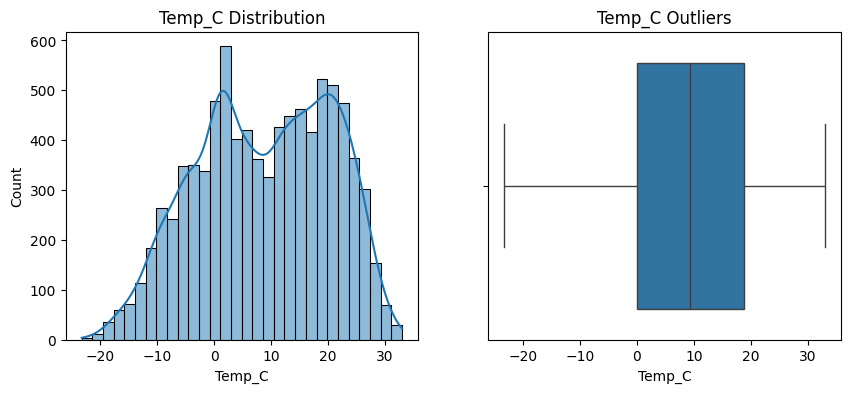

Dew Point Temp_C: Skew = -0.32, Kurt = -0.82


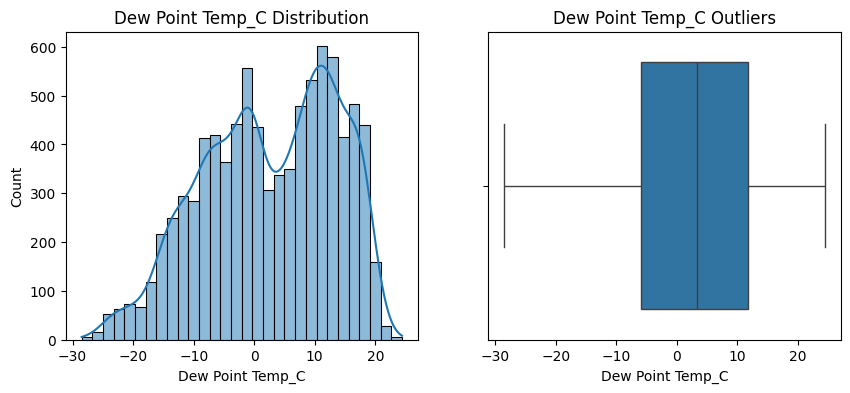

Rel Hum_%: Skew = -0.32, Kurt = -0.55


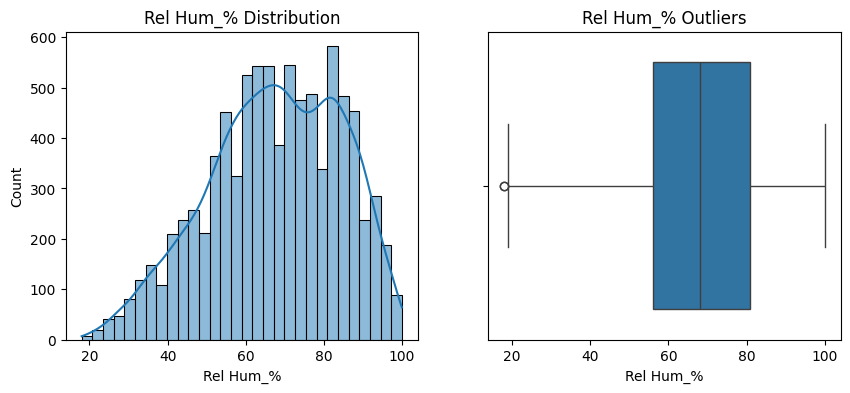

Wind Speed_km/h: Skew = 0.87, Kurt = 1.54


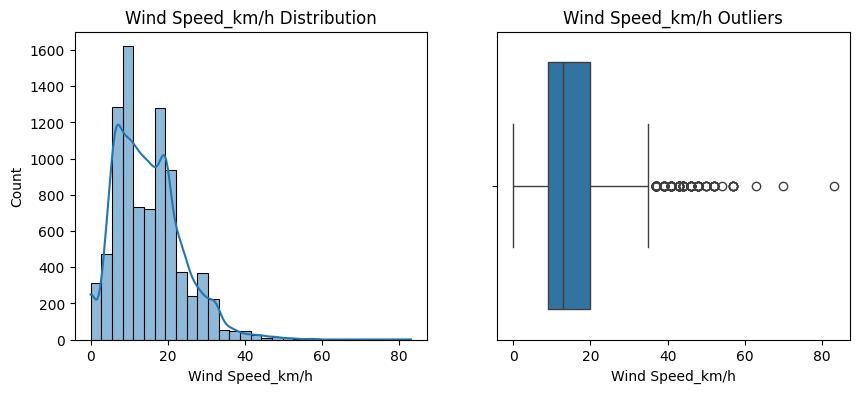

Visibility_km: Skew = 0.41, Kurt = -0.35


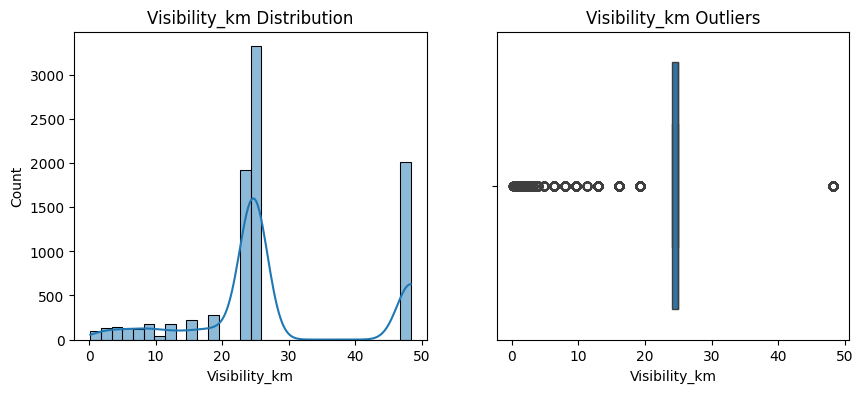

Press_kPa: Skew = -0.23, Kurt = 0.71


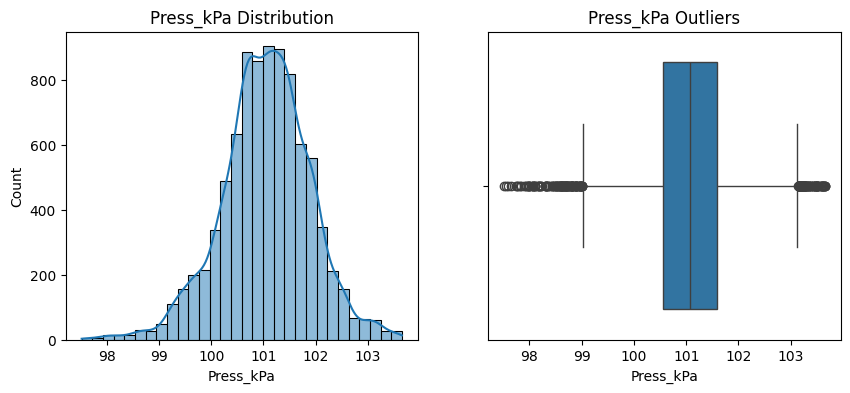

In [ ]:
#checking outliers using boxplot
num_cols = X.columns
for col in num_cols:
    print(f"{col}: Skew = {skew(df[col]):.2f}, Kurt = {kurtosis(df[col]):.2f}")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); sns.histplot(df[col], kde=True, bins=30); plt.title(f"{col} Distribution")
    plt.subplot(1,2,2); sns.boxplot(x=df[col]); plt.title(f"{col} Outliers")
    plt.show()

In [ ]:
#handling outliers using IQR
numerical_cols = dataset.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)].shape[0]
    print(f"Number of remaining outliers in '{col}': {outliers_count}")

Number of remaining outliers in 'Temp_C': 0
Number of remaining outliers in 'Dew Point Temp_C': 0
Number of remaining outliers in 'Rel Hum_%': 2
Number of remaining outliers in 'Wind Speed_km/h': 162
Number of remaining outliers in 'Visibility_km': 3539
Number of remaining outliers in 'Press_kPa': 207


Temp_C: Skew = -0.18, Kurt = -0.92


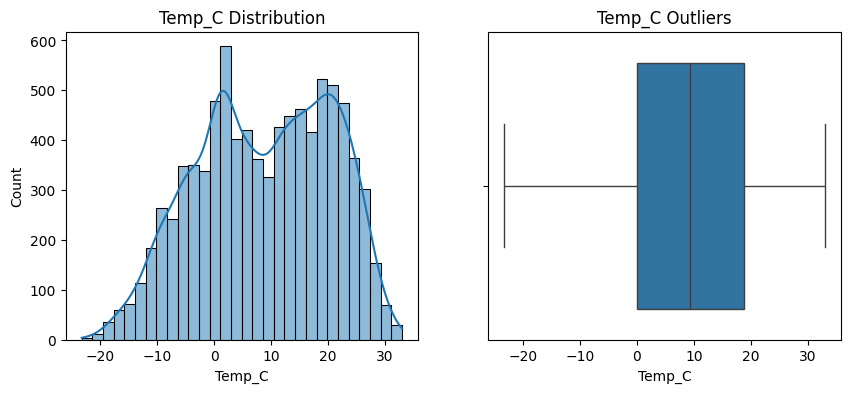

Dew Point Temp_C: Skew = -0.32, Kurt = -0.82


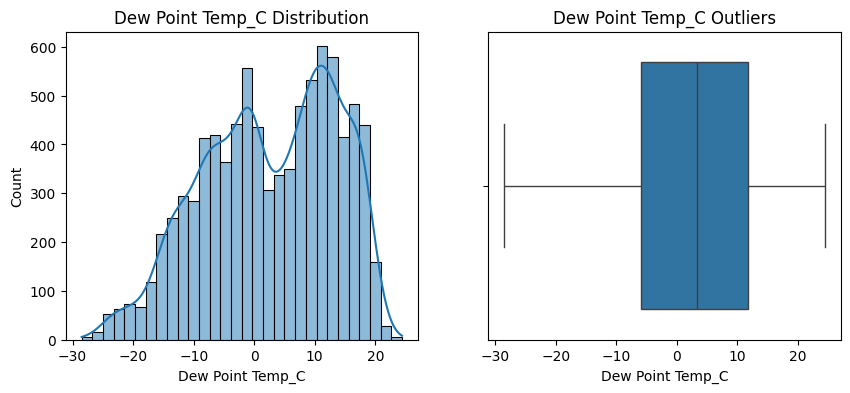

Rel Hum_%: Skew = -0.32, Kurt = -0.55


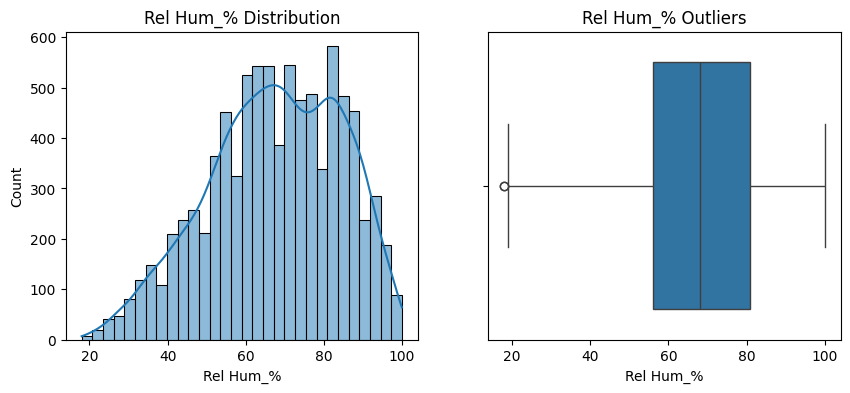

Wind Speed_km/h: Skew = 0.87, Kurt = 1.54


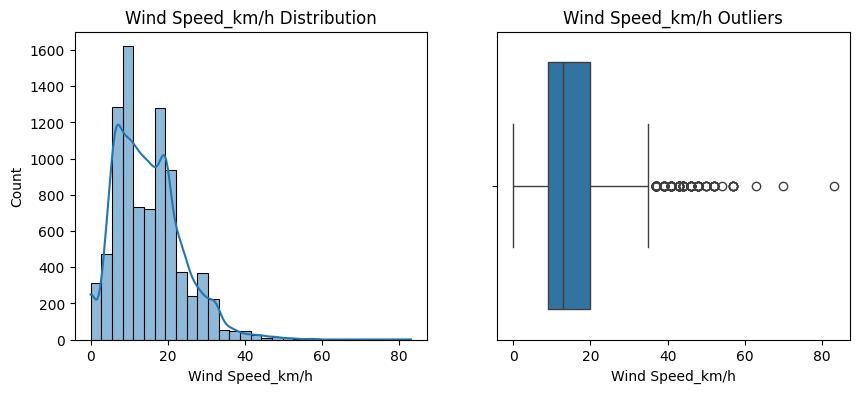

Visibility_km: Skew = 0.41, Kurt = -0.35


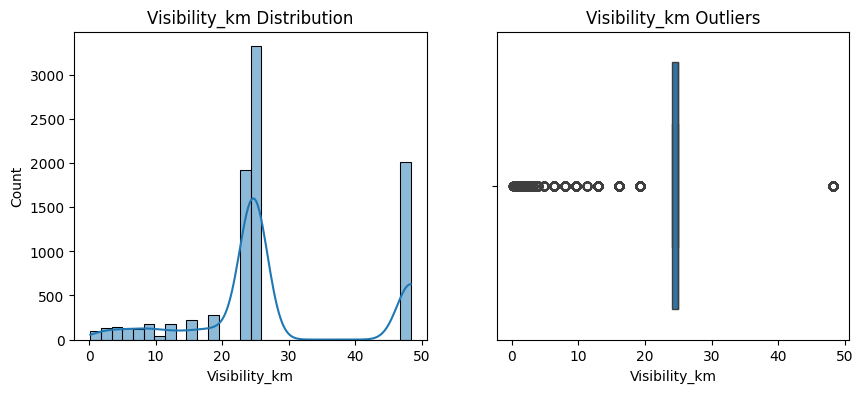

Press_kPa: Skew = -0.23, Kurt = 0.71


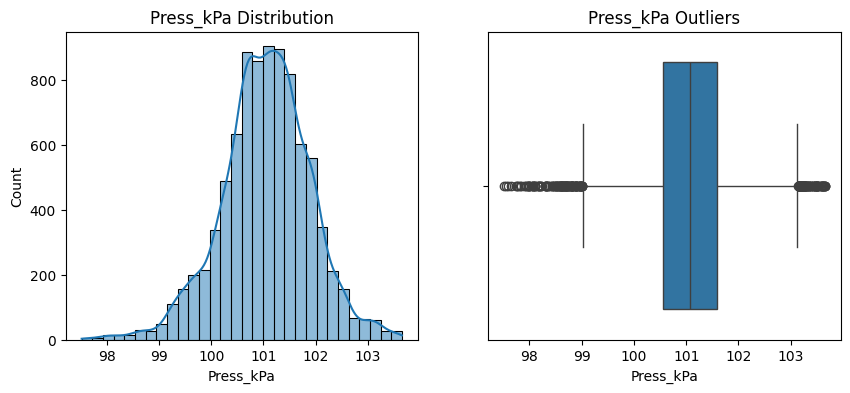

In [ ]:
#again check the outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

numerical_cols = dataset.select_dtypes(include=['number']).columns

for col in numerical_cols:
    print(f"{col}: Skew = {skew(dataset[col]):.2f}, Kurt = {kurtosis(dataset[col]):.2f}")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); sns.histplot(dataset[col], kde=True, bins=30); plt.title(f"{col} Distribution")
    plt.subplot(1,2,2); sns.boxplot(x=dataset[col]); plt.title(f"{col} Outliers")
    plt.show()

Temp_C: Skew = -0.18, Kurt = -0.92


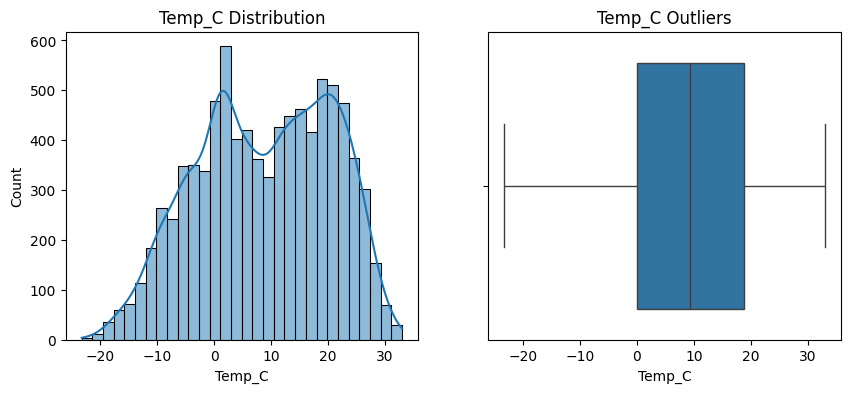

Dew Point Temp_C: Skew = -0.32, Kurt = -0.82


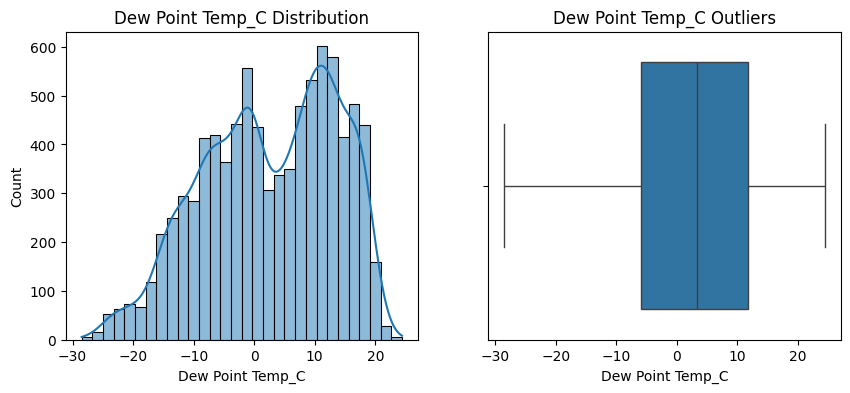

Rel Hum_%: Skew = -0.32, Kurt = -0.55


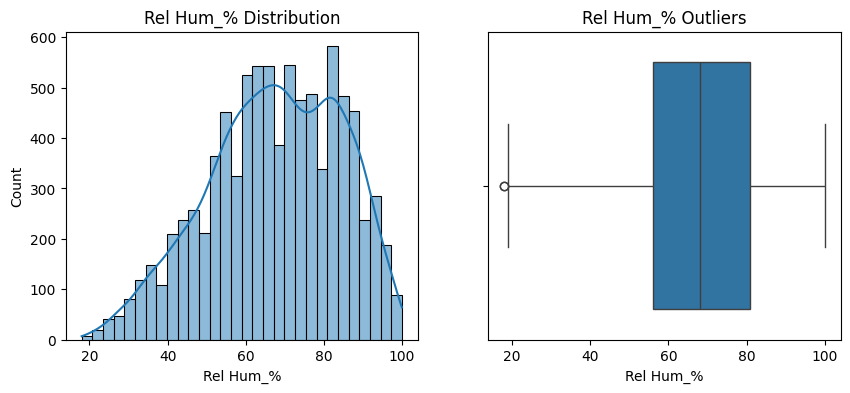

Wind Speed_km/h: Skew = 0.87, Kurt = 1.54


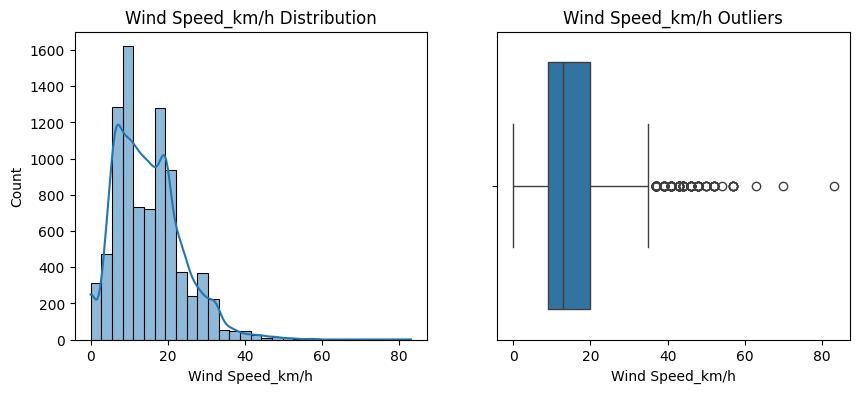

Visibility_km: Skew = 0.41, Kurt = -0.35


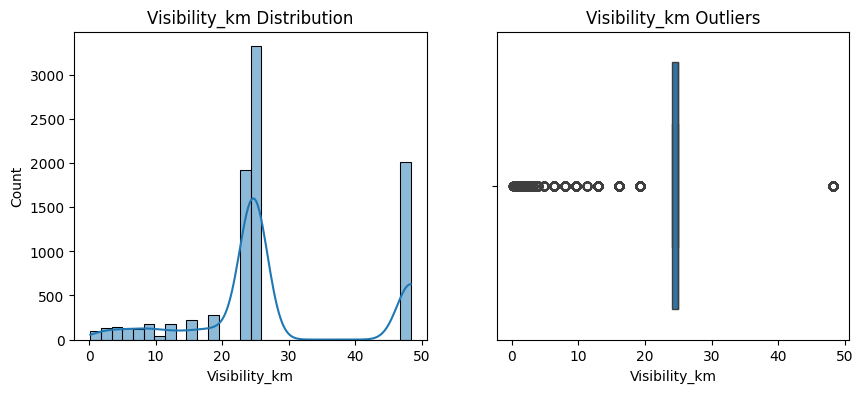

Press_kPa: Skew = -0.23, Kurt = 0.71


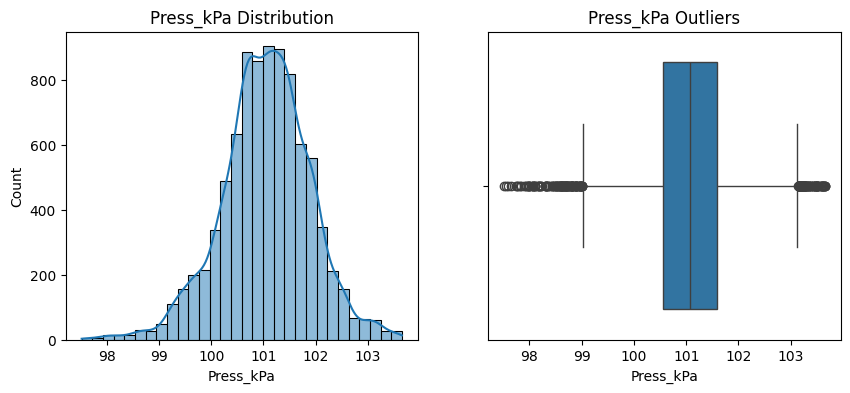

In [ ]:

num_cols = X.columns
for col in num_cols:
    print(f"{col}: Skew = {skew(df[col]):.2f}, Kurt = {kurtosis(df[col]):.2f}")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); sns.histplot(df[col], kde=True, bins=30); plt.title(f"{col} Distribution")
    plt.subplot(1,2,2); sns.boxplot(x=df[col]); plt.title(f"{col} Outliers")
    plt.show()

In [ ]:
#importing distance based algorithm from sklearmn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#train the knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#predicting the output
y_pred = knn.predict(X_test)

In [ ]:
# Evaluation
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test,y_pred))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test,y_pred))


KNN Accuracy: 0.6050085372794536

KNN Classification Report:
               precision    recall  f1-score   support

       Clear       0.58      0.65      0.61       665
      Cloudy       0.61      0.62      0.61       772
    Fog/Haze       0.66      0.57      0.61        37
        Rain       0.63      0.46      0.53       178
        Snow       0.75      0.52      0.62       105

    accuracy                           0.61      1757
   macro avg       0.65      0.56      0.60      1757
weighted avg       0.61      0.61      0.60      1757


KNN Confusion Matrix:
 [[429 232   1   3   0]
 [273 477   1  15   6]
 [  0   0  21  16   0]
 [ 23  55   7  81  12]
 [ 12  23   2  13  55]]
